# CS445 Lab 5 by Alex Boyce

This dataset contains information about red wine quality.
It includes all information about the wine, including chemical properties and quality rating.
The dataset contains 11 features in total:
fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality

Sourced from https://github.com/plotly/datasets/blob/master/winequality-red.csv

In [1]:
#lab5.py

# Data files:
# winequality-red.csv

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#ignore future warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#global dataset variable
df = pd.read_csv('winequality-red.csv')

                 #Print a portion of the raw data using head()
def print_data_head():
    # read the dataset
    print(df.head())
    print("\nColumn names:\n", df.columns.tolist(), "\n")

print_data_head()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### Visualize Covariance Matrix with Heatmap

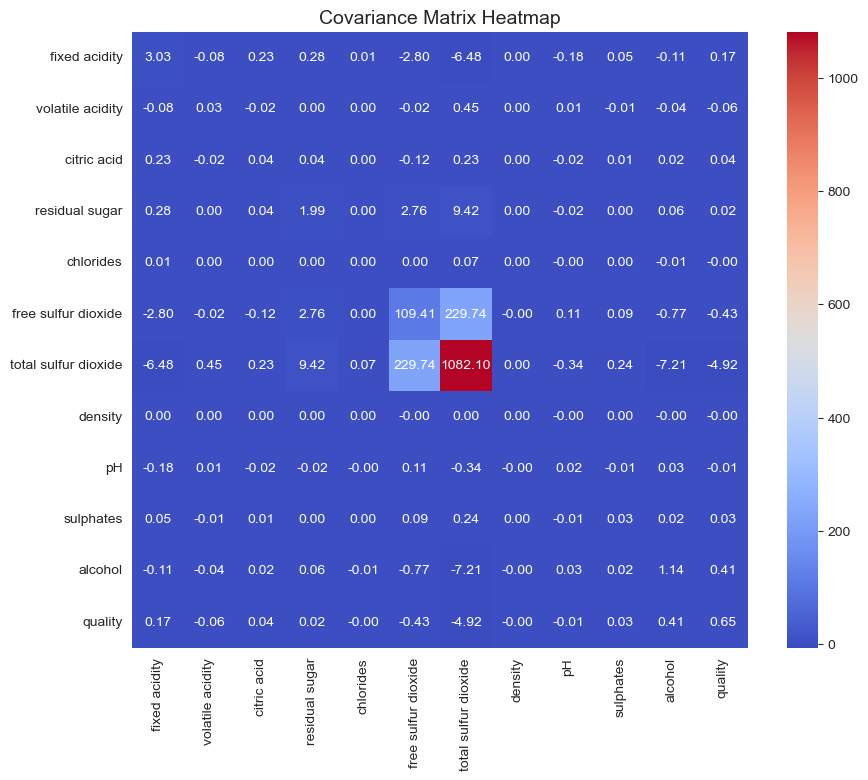

In [2]:
def covariance_matrix_heatmap():

    #calculate the covariance matrix
    covariance_matrix_heatmap = df.cov()

    #create a heatmap using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(covariance_matrix_heatmap, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Covariance Matrix Heatmap', fontsize=14)
    plt.savefig('Lab5_Boyce_Heatmap.png')
    plt.show()
covariance_matrix_heatmap()

This heatmap shows the covariance between the all the different features in the dataset. The features that are most correlated with quality are fixed acidity, citric acid, residual sugars, and alcohol. From this, we might be able to show that these features have a significant impact on the quality of red wine.

### Eigenvalues & Eigenvectors Visualization

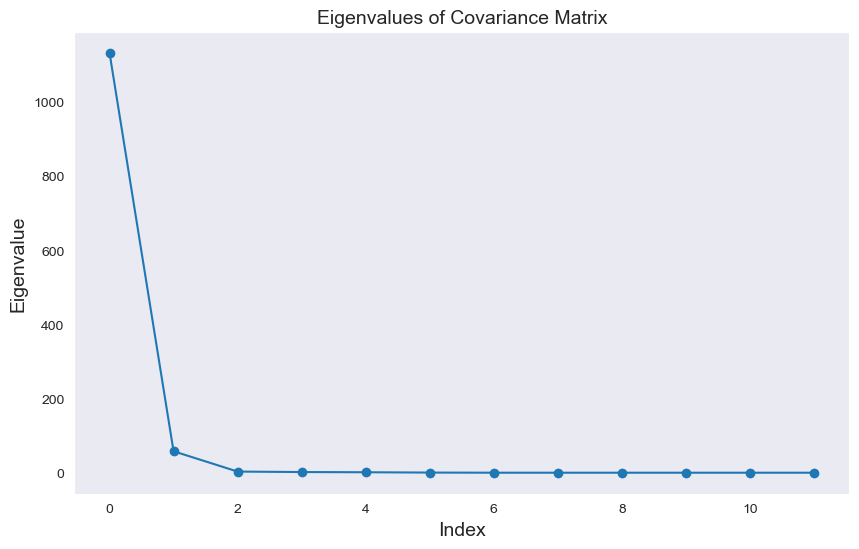

In [3]:
def eigenvalues_eigenvectors():
    #calculate the covariance matrix
    covariance_matrix = df.cov()

    #calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    #sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    #plot eigenvalues and eigenvectors
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_eigenvalues, marker='o')
    plt.title('Eigenvalues of Covariance Matrix', fontsize=14)
    plt.xlabel('Index', fontsize=14)
    plt.ylabel('Eigenvalue', fontsize=14)
    plt.grid()
    plt.savefig('Lab5_Boyce_eigenvalues.png')
    plt.show()
eigenvalues_eigenvectors()

This plot shows the eigenvalues of the covariance matrix. The eigenvalues represent the amount of variance explained by each principal component. The first few eigenvalues are significantly larger than the others, indicating that they explain most of the variance in the dataset. Dimensionality reduction techniques like PCA would be effective in reducing the number of features while retaining the majority of the information.

#### Scree Plot

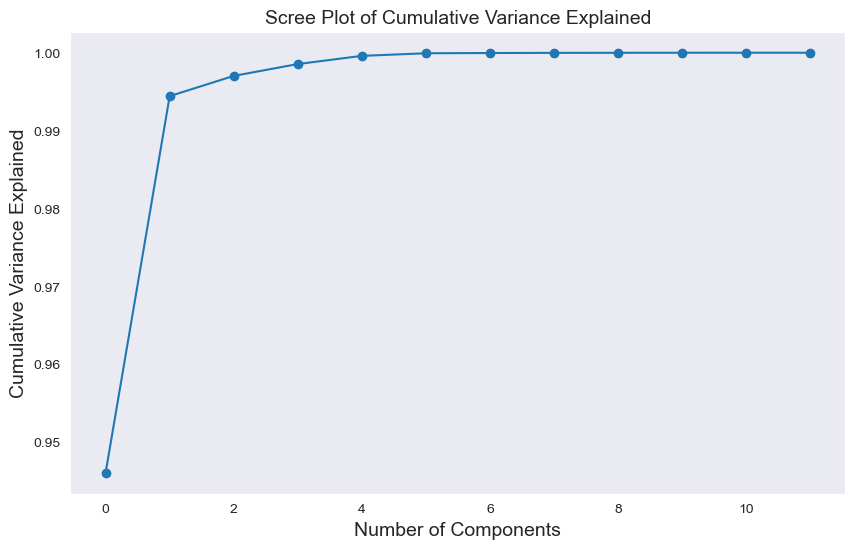

In [4]:
def scree_plot():
    #calculate the covariance matrix
    covariance_matrix = df.cov()

    #calculate eigenvalues and eigenvectors
    eigenvalues, _ = np.linalg.eig(covariance_matrix)

    #calculate cumulative variance explained
    cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

    #plot the scree plot
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_variance, marker='o')
    plt.title('Scree Plot of Cumulative Variance Explained', fontsize=14)
    plt.xlabel('Number of Components', fontsize=14)
    plt.ylabel('Cumulative Variance Explained', fontsize=14)
    plt.grid()
    plt.savefig('Lab5_Boyce_ScreePlot.png')
    plt.show()
scree_plot()

The scree plot shows the cumulative variance explained by the principal components. The first few components explain a significant amount of variance, matching the previously observed trend - while the later components contribute less.

### 2D Principal Component Scatterplot

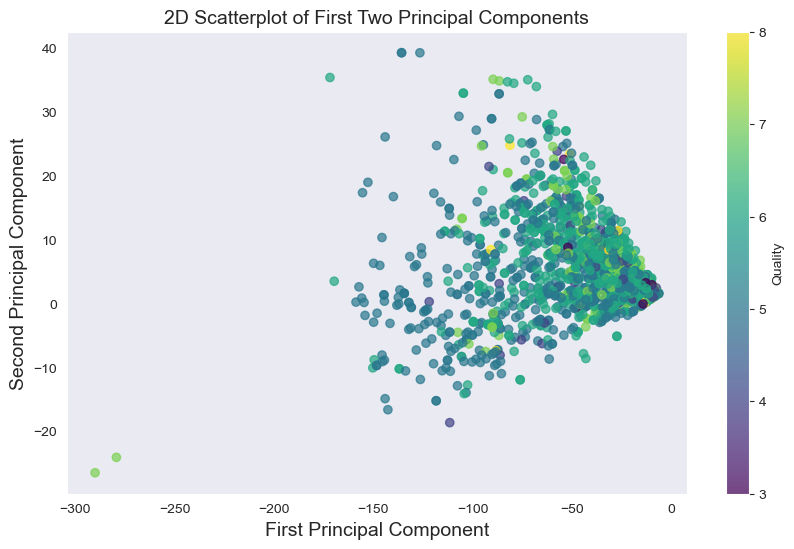

In [5]:
def scatterplot_2d():
    #calculate the covariance matrix
    covariance_matrix = df.cov()

    #calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    #sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    #project data onto the first two principal components
    projected_data = df.dot(sorted_eigenvectors[:, :2])

    #create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(projected_data.iloc[:, 0], projected_data.iloc[:, 1], c=df['quality'], cmap='viridis', alpha=0.7)
    plt.title('2D Scatterplot of First Two Principal Components', fontsize=14)
    plt.xlabel('First Principal Component', fontsize=14)
    plt.ylabel('Second Principal Component', fontsize=14)
    plt.colorbar(label='Quality')
    plt.grid()
    plt.savefig('Lab5_Boyce_ScatterPlot.png')
    plt.show()
scatterplot_2d()

This scatter plot shows the projection of the data onto the first two principal components. The points are colored based on their quality rating, although this graph can make this hard to tell. The plot shows that there is alot of clustering of points that might indicate that the first two principal components capture some of the variance related to quality.

### Biplot overlay of original feature vectors

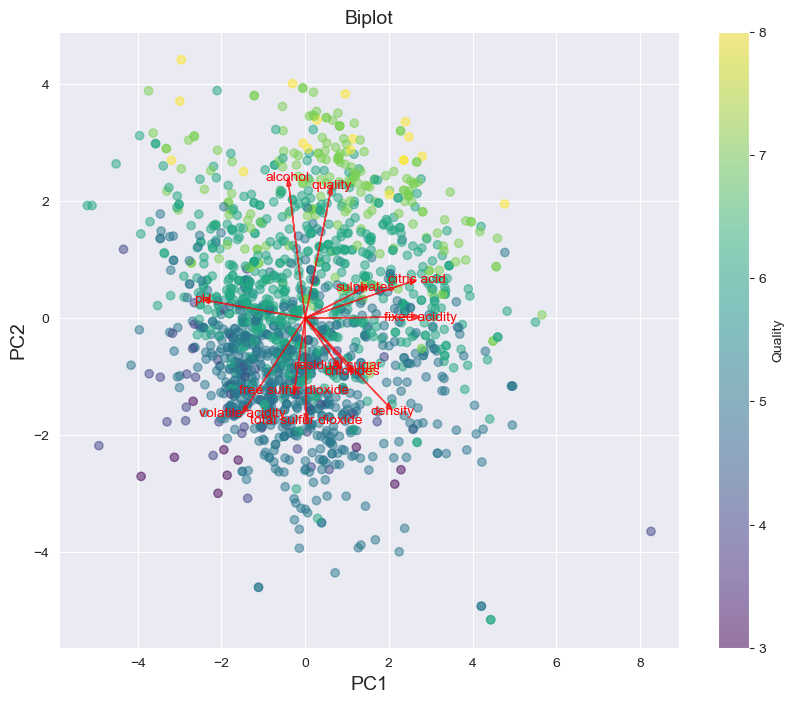

In [6]:
#run PCA and get the loadings
#used for biplot
def run_pca(n_components=2):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)

    #perform PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    #get loadings
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

    #get feature names
    feature_names = df.columns.tolist()

    #get quality labels
    y = df['quality'].values

    return X_pca, loadings, feature_names, y


def biplot(score, coeff, labels=None, y=None):
    xs = score[:, 0] #first pc
    ys = score[:, 1] #second pc
    n = coeff.shape[0] #number of features

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(xs, ys, c=y, cmap='viridis', alpha=0.5)
    plt.colorbar(scatter, label='Quality')

    for i in range(n):
        # Plot arrows for feature loadings, scaled for visibility
        plt.arrow(0, 0, coeff[i, 0] * 3, coeff[i, 1] * 3, color='r', alpha=0.7, head_width=0.1)
        if labels is None:
            plt.text(coeff[i, 0] * 3.2, coeff[i, 1] * 3.2, f"Var{i+1}", color='r', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 3.2, coeff[i, 1] * 3.2, labels[i], color='r', ha='center', va='center')

    plt.xlabel("PC1", fontsize=14)
    plt.ylabel("PC2", fontsize=14)
    plt.title("Biplot", fontsize=14)
    plt.grid(True)
    plt.savefig('Lab5_Boyce_Biplot.png')
    plt.show()

X_pca_2d, loadings, feature_names, y = run_pca(n_components=2)
biplot(X_pca_2d, loadings, labels=feature_names, y=y)

This biplot shows the projection of the data onto the first two principal components, with arrows representing the original feature vectors. The length and direction of the arrows indicate the contribution of each feature to the principal components.